In [1]:
name = "Renata Sarmet Smiderle Mendes"  # write YOUR NAME

honorPledge = "I affirm that I have not given or received any unauthorized help on this assignment, \
               and that this work is my own.\n"


print("\nName: ", name)
print("\nHonor pledge: ", honorPledge)


Name:  Renata Sarmet Smiderle Mendes

Honor pledge:  I affirm that I have not given or received any unauthorized help on this assignment,                and that this work is my own.



# MAC0460/MAC5832 (2021)


## EP1 -- The perceptron algorithm

The goal of this EP is to implement the perceptron algorithm. For simplicity, we will implement for and test it on datapoints in $\mathbb{R}^2$. 

The datapoints are assumed to be stored in a numpy array.
This is also an opportunity to start getting used to Python and Numpy, for those that are not used yet.

<hr>

Let $X = \Big\{ (\mathbf{x}^{(1)},y^{(1)}), (\mathbf{x}^{(2)},y^{(2)}), \ldots, (\mathbf{x}^{(N)},y^{(N)})\Big\}$, $\mathbf{x}^{(i)} \in \mathbb{R}^d$ and $y^{(i)} \in \{-1, +1\}$, $i=1,2,\ldots,N$, be a set of training examples. We will assume they are linearly separable (meaning that there is a hyperplane that separates positive from negative examples).

Given $\mathbf{x} = (x_1, \ldots, x_d)  \in \mathbb{R}^d$, let $\tilde{\mathbf{x}} = (1, x_1, \ldots, x_d) \in \mathbb{R}^{1+d}$.

The perceptron algorithm determines a weight vector $\mathbf{w} \in \mathbb{R}^{1+d}$ such that $\mathrm{sign}(\mathbf{w}^T \tilde{\mathbf{x}}^{(i)}) = y^{(i)}$, $\forall i$, where

$$
sign(z) = \left\{\begin{array}{ll}+1, & \mbox{if $z \geq 0$,}\\ -1, & \mbox{if $z < 0$.}\\
\end{array}\right.
$$




## Creating a training set 

- Our dataset will consist of $N$ points. Let us choose some points in the $[-1,2]\times [-1,2] \subseteq \mathbb{R}^2$ region.
- Let us fix a function $f(x_1,x_2) = w_0 + w_1\,x_1 + w_2\,x_2$, such that its zero points form a line that partitions the $[-1,2]\times [-1,2]$ square into two regions; consider $w_2 \neq 0$
- We define the points $(x_1,x_2)$ such that $f(x_1,x_2) \geq 0$ as the positive examples and those such that $f(x_1,x_2) < 0$ as the negative ones (that is, the class label of a point is determined by the signal of $f$ at that point).
- Let us also plot a graph of the examples (<font color="blue">positives</font> in blue and   <font color="red">negatives</font> in red) and also of the decision surface.

In [3]:
# # Installing libraries
# import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install matplotlib

Shape of array X:  (5, 2)
Number of examples:  5
Shape of array Xe:  (5, 3)
Shape of array w_target:  (3, 1)
Target weight array: 
 [[ 0.5]
 [-1. ]
 [ 1. ]]
Shape of array y:  (5, 1)
color:  ['red', 'blue', 'blue', 'red', 'blue']


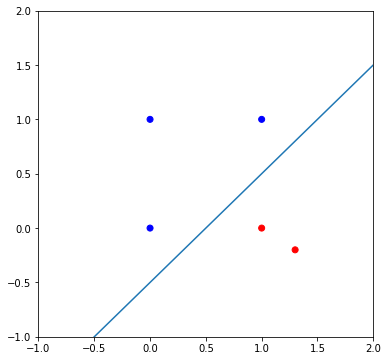

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create a numpy array with N points
xmin = ymin = -1
xmax =ymax = 2

X = np.asarray([[1.3, -0.2],[0,0],[0,1],[1,0],[1,1]])
print("Shape of array X: ", X.shape)
N = X.shape[0]
print("Number of examples: ", N)

# add a left column with 1's into X -- X extended,
# that way Xi has the same number of elements of the weight array
def add_column_of_ones(X):
    return np.hstack(( np.ones((X.shape[0],1)), X ) )
Xe = add_column_of_ones(X)
print("Shape of array Xe: ", Xe.shape)

# define a target weight vector
w_target = np.asarray([[0.5],[-1], [1]])
print("Shape of array w_target: ", w_target.shape)
print("Target weight array: \n", w_target)

# define y (class) values, based on the line defined by the target weight vector
y = np.sign(np.dot(Xe, w_target))
print("Shape of array y: ", y.shape)


# Plotting ...

# plot the line
a = -w_target[1] / w_target[2] # slope  -- we will have trouble if w_target[2]=0 ...
b = -w_target[0] / w_target[2] # intercept
x_l = np.linspace(xmin, xmax, 50)
y_l = a*x_l + b

plt.figure(figsize=(6,6))
plt.plot(x_l, y_l);
axes = plt.gca()
axes.set_xlim([xmin,xmax])
axes.set_ylim([xmin,ymax])

# Determine the colors of each of the examples
colors = ["blue" if y[i]==1 else "red" for i in range(N)]
print("color: ", colors)

# plot the examples
plt.scatter(X[:,0],X[:,1],c=colors)


## Weight initialization

Let us start with a weight vector that clearly is not too close to the target weights. This will be our initial hypothesis.

To see how our hypothesis is classifying the examples, let us use the following convention.

We will use the colors (red or blue) to indicate the target label (ground-truth): <font color="blue">positive</font> and <font color="red">negative</font>

To indicate how the current hypothesis is classifying the examples we will use markers as follows:
- o : corretly classified by the hypothesis<br>
- x : wrongly classified by the hypothesis<br>


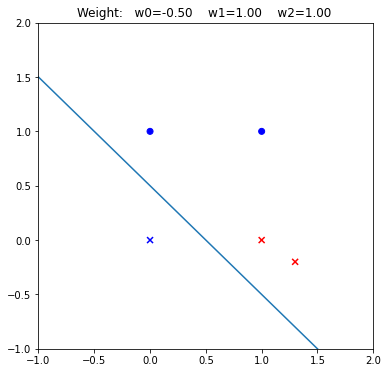

In [5]:
def plot_state(Xe,w,xmin=-1,xmax=2,ymin=-1,ymax=2, current_point=None):
    # compute yhat - prediction
    yhat = np.sign(np.dot(Xe,w))

    correct = np.where(y == yhat)[0]
    misclassified = np.where(y != yhat)[0]

    colors_o = ["blue" if y[i]==1 else "red" for i in correct]
    colors_x = ["blue" if y[i]==1 else "red" for i in misclassified]

    # plotting
    a = -w[1] / w[2] # slope
    b = -w[0] / w[2] # intercept
    x_l = np.linspace(-1, 2, 50)
    y_l = a*x_l + b

    plt.figure(figsize=(6,6))
    plt.plot(x_l, y_l);
    axes = plt.gca()
    axes.set_xlim([xmin,xmax])
    axes.set_ylim([xmin,ymax])
    
    str_current_point = f"\nCurrent misclassified point to use: {current_point}" if current_point is not None else ""
    plt.title(f"Weight:   w0=%.2f    w1=%.2f    w2=%.2f {str_current_point}" %(w[0],w[1],w[2]))
    plt.scatter(X[correct,0],X[correct,1],c=colors_o, marker='o');
    plt.scatter(X[misclassified,0],X[misclassified,1],c=colors_x, marker='x');

    
# Starting weight vector <---- change as you wish (as long as w0[2] != 0)
w0 = np.asarray([[-0.5], [1] , [1]])
   
plot_state(Xe,w0)


# Exercise

Implement the PERCEPTRON algorithm, following the specification in the next box.

NOTE, however, that you should avoid loops (for, while) that scan arrays, index by index. Use Numpy methods.

If parameter <tt>plot=True</tt>, the "state" at the beginning of each iteration must be plotted


<b>Suggestion:</b> Rather than plotting the state at each iteration, you can write a code that generates an animation that shows the sequence of the states.


Initial weight vector=
 [[-0.5]
 [ 1. ]
 [ 1. ]]
Final weight vector=
 [[ 0.5]
 [-1.3]
 [ 1.2]]


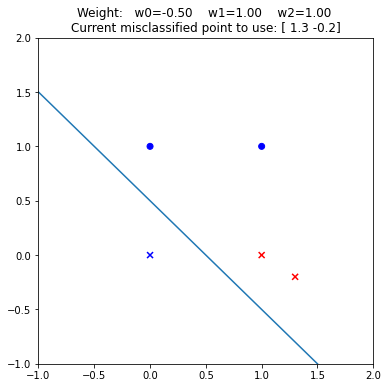

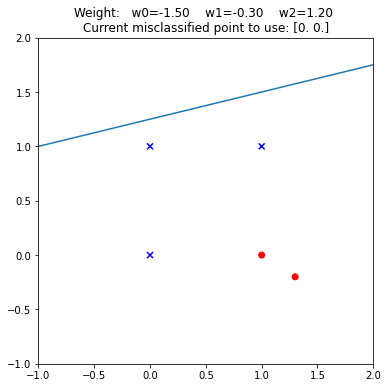

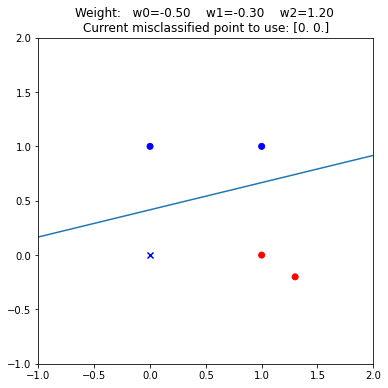

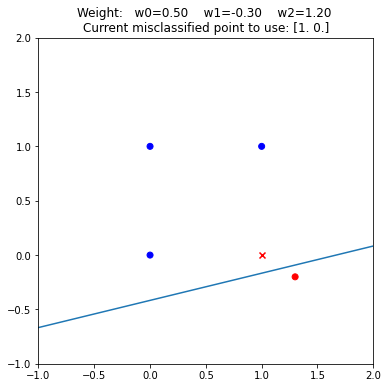

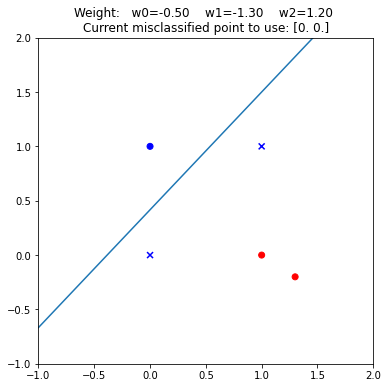

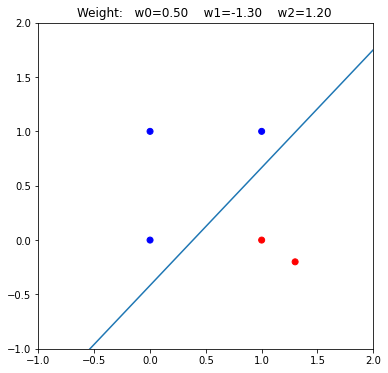

In [6]:
def perceptron(Xe,y,w0,plot=False):
    """
    Parameters:
       Xe   : ndarray (N,d+1) - it already has the 1's in column 0
       y    : ndarray (N,1)
       w0   : ndarray (d+1,1) - the initial weight vector
       plot : If True, plot the state at the beginning of each iteration
       
    Returns:
       w : ndarray (d+1,1) - the final weight vector
    """
    
    # Compute yhat - prediction
    yhat = np.sign(np.dot(Xe,w0))
    
    # Get initial misclassified points
    misclassified = np.where(y != yhat)[0].tolist()  
    
    # Initialize w with w0
    w = w0
    
    # While there are misclassified points, we will continue
    while(len(misclassified) > 0):
        
        # Get the first misclassified point
        pos = misclassified.pop(0)
        yi = np.asarray(y[pos])
        xi = np.asarray([Xe[pos]])
        
        if plot:
            # Plot the current state
            plot_state(Xe,w, current_point=xi[0][1:])
        
        # Update current weight (w <- w + yi * xi)
        adjustment = np.asarray([np.dot(yi,xi)]).transpose()
        w = np.add(w, adjustment)
        
        # Compute yhat - prediction
        yhat = np.sign(np.dot(Xe,w))

        # Get remaining misclassified points
        misclassified = np.where(y != yhat)[0].tolist()  
    
    # Return the final weight vector
    return w


# Test your function for w0, X and y as defined above
w0 = np.asarray([[-0.5], [1] , [1]]) # <---- you can change it (as long as w0[2] != 0)
print("Initial weight vector=\n", w0)

w = perceptron(Xe,y,w0,plot=True)


# Print the final weight vector and plot the final graph using the function plot_state.

print("Final weight vector=\n", w)

# Plot the final state
plot_state(Xe,w)


# What else could be explored

Feel free to experiment some modifications in your code (just add new code cells, if that is the case):

0. Change the set of examples $X$ or the initial weight vector and run the code
1. You could change the code so that the initial weight vector is initialized with ramdom numbers
2. You could also generate the set of examples $\mathbf{x}$ randomly (for instance, points randomly selected from two Gaussian distributions)
3. What do you need to change in order to have your code ready for $d>2$ dimensional data ?
4. How do you need to change your algorithm in order to have the POCKET version, so that it will work on non-linearly separable data?

## Test the function for w0 and X defined randomly

Shape of array X:  (15, 2)
Number of examples:  15
Shape of array Xe:  (15, 3)
Shape of array w_target:  (3, 1)
Target weight array: 
 [[ 0.72035379]
 [-0.70217321]
 [ 0.2391469 ]]
Shape of array y:  (15, 1)


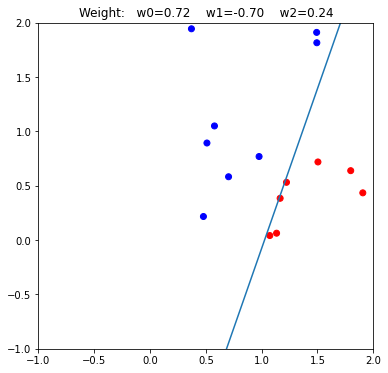

In [205]:
# define a random X
X = np.asarray(np.random.rand(15,2))*2
print("Shape of array X: ", X.shape)
N = X.shape[0]
print("Number of examples: ", N)

# add a left column with 1's into X -- X extended,
# that way Xi has the same number of elements of the weight array
def add_column_of_ones(X):
    return np.hstack(( np.ones((X.shape[0],1)), X ) )
Xe = add_column_of_ones(X)
print("Shape of array Xe: ", Xe.shape)

# define a random target weight vector and make sure w[2] is not 0
v1 = random.uniform(-2,2)
v2 = random.uniform(-2,2)
v3 = random.uniform(-2,2)
while(v3==0):
    v3 = random.uniform(-2,2)
    
w_target = np.asarray([[v1],[v2], [v3]])


print("Shape of array w_target: ", w_target.shape)
print("Target weight array: \n", w_target)

# define y (class) values, based on the line defined by the target weight vector
y = np.sign(np.dot(Xe, w_target))
print("Shape of array y: ", y.shape)

plot_state(Xe,w_target)


Initial weight vector=
 [[0.69560174]
 [0.19872008]
 [0.98869316]]
Final weight vector=
 [[ 0.69560174]
 [-1.41487754]
 [ 0.98392542]]


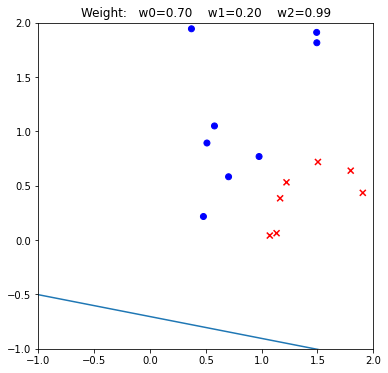

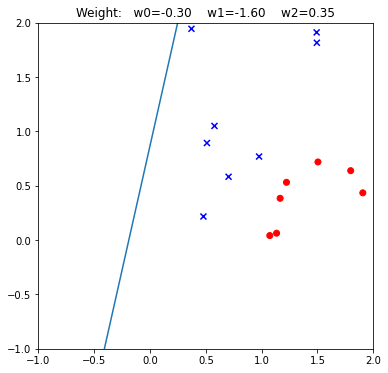

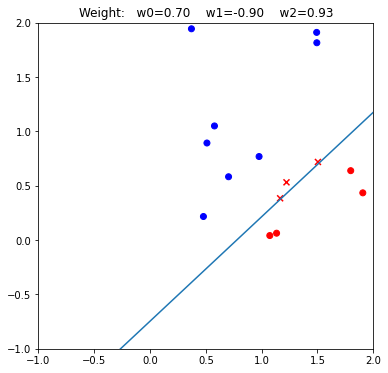

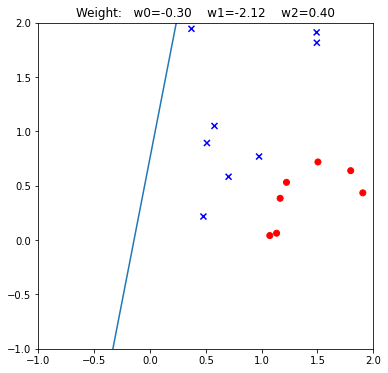

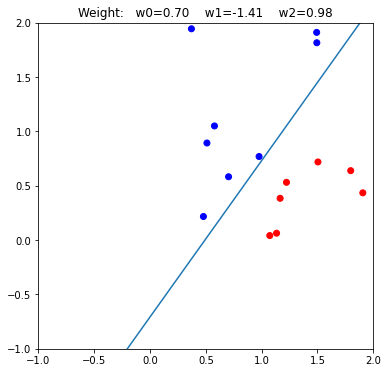

In [206]:
# define a random initial weight vector and make sure w[2] is not 0
w0 = np.random.rand(3,1)
while(w0[2]==0):
    w0 = np.random.rand(3,1)
print("Initial weight vector=\n", w0)

# Fit
w = perceptron(Xe,y,w0,plot=True)

# Print the final weight vector and plot the final graph using the function plot_state.
print("Final weight vector=\n", w)

# Plot the final state
plot_state(Xe,w)

## What do you need to change in order to have your code ready for  d > 2 dimensional data ?
Nothing, the algorithm already works for d>2 dimensional data. 
I just cannot use that plot function because it is for 2 dimensions.
Following we have an example with 3 dimensions:

In [222]:
# define a random X with
X = np.asarray(np.random.rand(5,3))
print("Shape of array X: ", X.shape)
N = X.shape[0]
print("Number of examples: ", N)

# add a left column with 1's into X -- X extended,
# that way Xi has the same number of elements of the weight array
def add_column_of_ones(X):
    return np.hstack(( np.ones((X.shape[0],1)), X ) )
Xe = add_column_of_ones(X)
print("Shape of array Xe: ", Xe.shape)
print("Xe array: \n", Xe)

# define a random target weight vector and make sure w[2] is not 0
v1 = random.uniform(-2,2)
v2 = random.uniform(-2,2)
v3 = random.uniform(-2,2)
v4 = random.uniform(-2,2)
while(v4==0):
    v4 = random.uniform(-2,2)
    
w_target = np.asarray([[v1],[v2],[v3],[v4]])


print("Shape of array w_target: ", w_target.shape)
print("Target weight array: \n", w_target)

# define y (class) values, based on the line defined by the target weight vector
y = np.sign(np.dot(Xe, w_target))
print("Shape of array y: ", y.shape)
print("y array: \n", y)

Shape of array X:  (5, 3)
Number of examples:  5
Shape of array Xe:  (5, 4)
Xe array: 
 [[1.         0.89339105 0.01891759 0.29246263]
 [1.         0.22191093 0.50458425 0.15475114]
 [1.         0.14285082 0.25359962 0.17371902]
 [1.         0.63802206 0.71176054 0.87904055]
 [1.         0.12925269 0.29323925 0.55759283]]
Shape of array w_target:  (4, 1)
Target weight array: 
 [[ 1.19970404]
 [-1.49979656]
 [ 0.7312479 ]
 [-0.98258252]]
Shape of array y:  (5, 1)
y array: 
 [[-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]]


In [227]:
# define a initial weight vector 
w_target = np.asarray([[0.1],[0.3],[-1.5],[1]])*2
print("Initial weight vector=\n", w0)

# Fit
w = perceptron(Xe,y,w0,plot=False)

# Print the final weight vector and plot the final graph using the function plot_state.
print("Final weight vector=\n", w)

Initial weight vector=
 [[0.4337745 ]
 [0.18717632]
 [0.76060872]
 [0.78952104]]
Final weight vector=
 [[ 0.4337745 ]
 [-1.98800617]
 [ 1.31758946]
 [-0.93448076]]


## How do you need to change your algorithm in order to have the POCKET version, so that it will work on non-linearly separable data? 
To have the pocket version of the algorithm, instead of using the weights obtained at the end of all iterations, we should store the best configuration found so far at each step. We also should add a stop criteria controlling the number of iterations. At the end, the hypothesis is the best possible that could be obtained from the training set with this algorithm.